# Le couloir

### Partie 1 : Importations

On importe les algorithmes ainsi que les librairies utiles

In [1]:
# LES ALGORITHMES
from QLearning import *
from DQN import *

# POUR AFFICHAGE
import matplotlib as plt
import seaborn as sns

# POUR ENVIRONNEMENT
import gym
from gym import spaces

### Partie 2 : Environnement LineWorld


Nous avons un couloir de taille n représenté par un array.
L'agent commence tout à gauche, et doit traverser le couloir pour arriver à droite.

Il peut soit se déplacer à gauche soit se déplacer à droite.
La solution optimale est de se déplacer vers la droite à chaque action.

In [2]:
import gym
from gym import spaces

class LineWorldEnv(gym.Env):
    def __init__(self, n_states=3):
        super(LineWorldEnv, self).__init__()
        self.n_states = n_states
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Discrete(n_states)
        self.state = 0

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 0 and self.state > 0:
            self.state -= 1
        elif action == 1 and self.state < self.n_states - 1:
            self.state += 1
        done = self.state == self.n_states - 1
        reward = 10 if done else -1
        return self.state, reward, done, {}

    def render(self, mode="human"):
        print("État actuel :", self.state)
    
    def seed(self, seedInt) :
        # environnement deterministe, methode necessaire pour stablebaseline
        pass

## Observations

### 1. Optimisation de QLearning

On s'intéresse à quelques paramètres du QLearning : epsilon, learningRate (alpha) et gamma
- epsilon représente la probabilité d'exploiter
- Au plus le learningRate est élevé, au plus les observations ont du poids par rapport à ce que l'agent sait déjà
- Au plus le gamma est élevé, au plus ce qui arrive dans le long terme est considéré important

(On peut avoir quelques intuitions sur les effets de ces paramètres, un gamma très faible peut pousser à des actions court-termiste par exemple)

### 1. Comparaison convergence vers solution optimale LineWorld

On sait que la récompense obtenue au bout du couloir est de 10
Et que pour tout autre action la récompense maximale est de 1

Ainsi la récompense optimale obtensible pour un couloir de taille n >= 3 est de 12-n


Nous pouvons afficher le point (12-taille_couloir) - recompense afin que l'axe des abscisses représente la récompense maximale obtensible pour l'environnement donné.

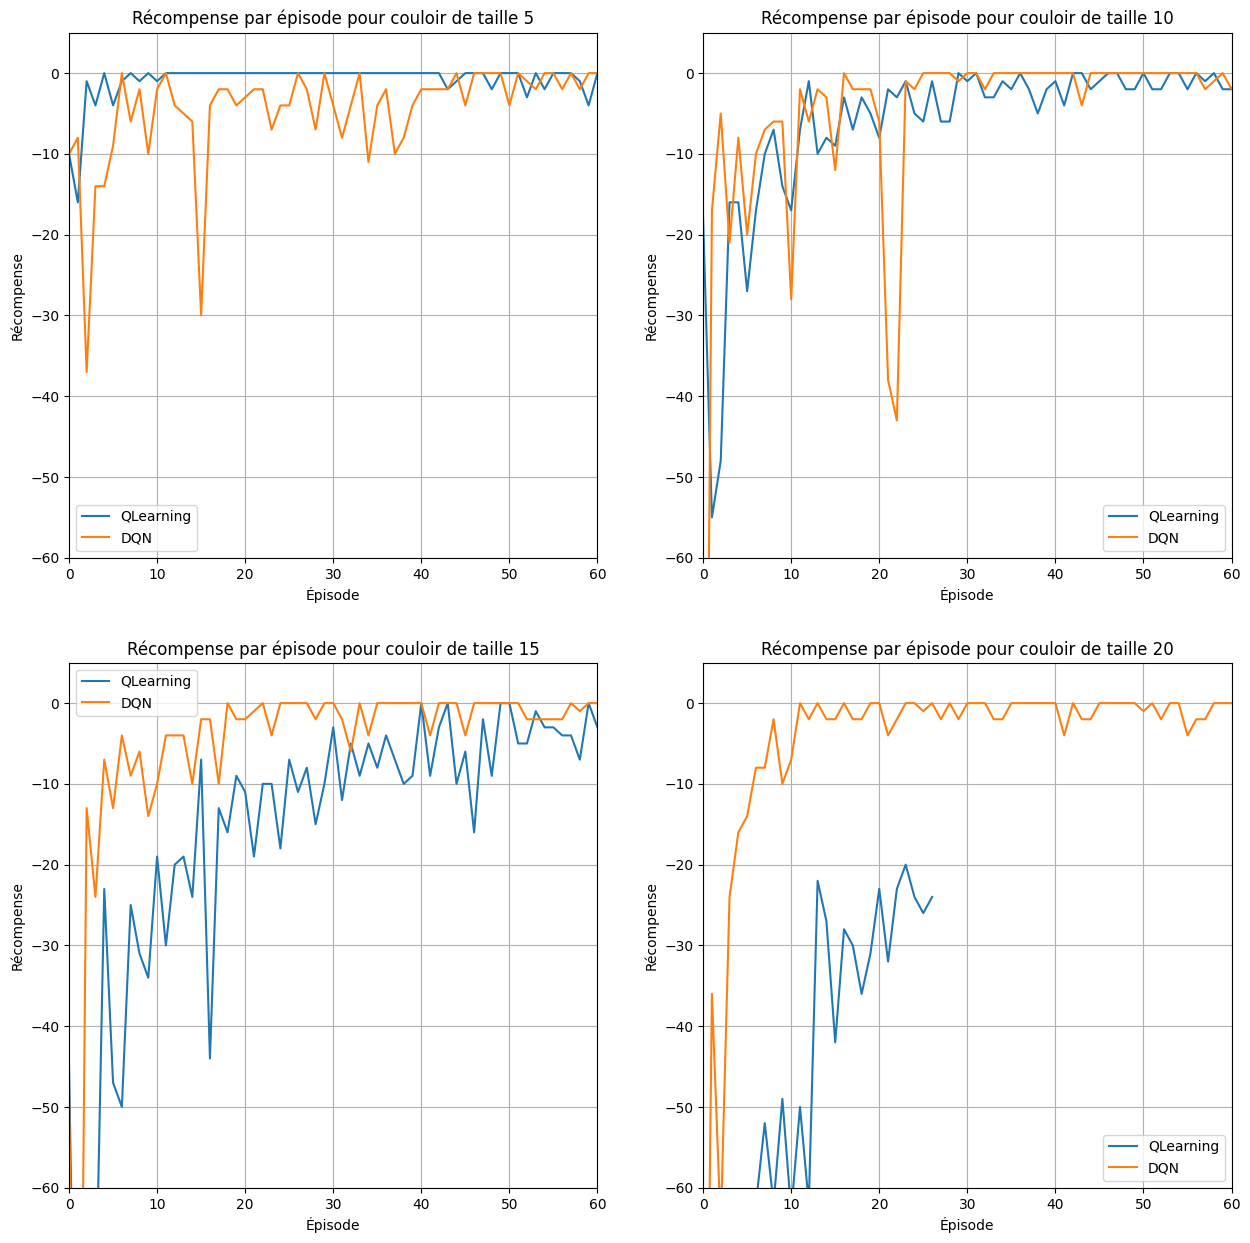

In [4]:
import matplotlib.pyplot as plt

data = [(5, 0, 0), (10, 0, 1), (15, 1, 0), (20, 1, 1)]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

timesteps = 2000


for (n_states, x, y) in data :
    env = LineWorldEnv(n_states)
    
    DQNmodel, DQNrewards = train_dqn(env, timesteps = timesteps)
    QTable, QRewards = train_q_learning(env, timesteps = timesteps)
    
    
    axes[x, y].plot([r - (12-n_states) for r in QRewards], label='QLearning')
    axes[x, y].plot([r - (12-n_states) for r in DQNrewards], label='DQN')
    axes[x, y].set_xlim([0, 60])
    axes[x, y].set_ylim([-60, 5])
    axes[x, y].legend()
    axes[x, y].set_xlabel("Épisode")
    axes[x, y].set_ylabel("Récompense")
    axes[x, y].set_title(f"Récompense par épisode pour couloir de taille {n_states}")
    axes[x, y].grid()
plt.show()

Nous remarquons que la méthode tabulaire est plus efficace lorsque que le couloir est de taille limitée.
Néanmoins lorsque la taille du couloir grandit, la méthode (DQN) faisaint usage d'un réseau à la place d'un tableau (QLearning) semble plus adaptée.